### **Análisis de app de usuarios**

En el notebook se analiza el dataset "user_app_data.csv", que contiene los datos de uso de aplicaciones de una compañia de tecnología emergente.

### **1. Importación del dataset**

En esta sección de importan las librerias necesarias y se carga el dataset

In [1]:
# importacion de las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importacion de los datos y conversion a dataframe
app = pd.read_csv('user_app_data.csv')
print(app.head(10))

   user_id  app_version platform  session_duration  number_of_sessions  \
0        1          1.2  Android               109                  11   
1        2          1.3  Android               116                  17   
2        3          1.0  Android                94                  13   
3        4          1.2      iOS                47                   1   
4        5          1.2      iOS                99                   2   
5        6          1.3  Android                55                   9   
6        7          1.0      iOS               168                   3   
7        8          1.0      iOS                52                   1   
8        9          1.2      iOS               144                  16   
9       10          1.1      iOS                13                   6   

   country  user_feedback  
0   France              1  
1       UK              2  
2   France              5  
3   Canada              4  
4   Canada              3  
5  Germany       

In [3]:
# ultimas filas del dataframe
print(app.tail(5))

     user_id  app_version platform  session_duration  number_of_sessions  \
295      296          1.3      iOS                33                   4   
296      297          1.1  Android               118                   6   
297      298          1.2  Android                65                   1   
298      299          1.0      iOS               146                   5   
299      300          1.3      iOS               177                   1   

     country  user_feedback  
295       UK              1  
296  Germany              2  
297  Germany              5  
298   France              5  
299    Italy              3  


In [4]:
# informacion del dataframe
print(app.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             300 non-null    int64  
 1   app_version         300 non-null    float64
 2   platform            300 non-null    object 
 3   session_duration    300 non-null    int64  
 4   number_of_sessions  300 non-null    int64  
 5   country             300 non-null    object 
 6   user_feedback       300 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 16.5+ KB
None


### **2. Limpieza de los datos**

In [5]:
# correccion de tipo de datos
app = app.astype({col: 'string' for col in app.select_dtypes(include='object').columns})
print('Los tipos de datos del dataframe son:')
print(app.dtypes)

Los tipos de datos del dataframe son:
user_id                        int64
app_version                  float64
platform              string[python]
session_duration               int64
number_of_sessions             int64
country               string[python]
user_feedback                  int64
dtype: object


In [6]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=app.shape[0]-app.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=app.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(app.isnull().sum(axis=0)/app.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
user_id,300,0,0.0
app_version,300,0,0.0
platform,300,0,0.0
session_duration,300,0,0.0
number_of_sessions,300,0,0.0
country,300,0,0.0
user_feedback,300,0,0.0


In [7]:
# valores unicos columna platform
print(app['platform'].unique())

<StringArray>
['Android', 'iOS']
Length: 2, dtype: string


In [8]:
# valores unicos columna country
print(app['country'].unique())

<StringArray>
['France', 'UK', 'Canada', 'Germany', 'Mexico', 'USA', 'Spain', 'Italy']
Length: 8, dtype: string


### **3. Análisis de los datos**

In [16]:
# agrupar los datos por plataforma
app_grouped_by_platform = app.groupby('platform')
print(app_grouped_by_platform.head(5))

    user_id  app_version platform  session_duration  number_of_sessions  \
0         1          1.2  Android               109                  11   
1         2          1.3  Android               116                  17   
2         3          1.0  Android                94                  13   
3         4          1.2      iOS                47                   1   
4         5          1.2      iOS                99                   2   
5         6          1.3  Android                55                   9   
6         7          1.0      iOS               168                   3   
7         8          1.0      iOS                52                   1   
8         9          1.2      iOS               144                  16   
11       12          1.2  Android               124                   5   

    country  user_feedback  
0    France              1  
1        UK              2  
2    France              5  
3    Canada              4  
4    Canada              3  


In [28]:
# numero de sesiones por plataforma
platform_sessions = app_grouped_by_platform['number_of_sessions'].sum()

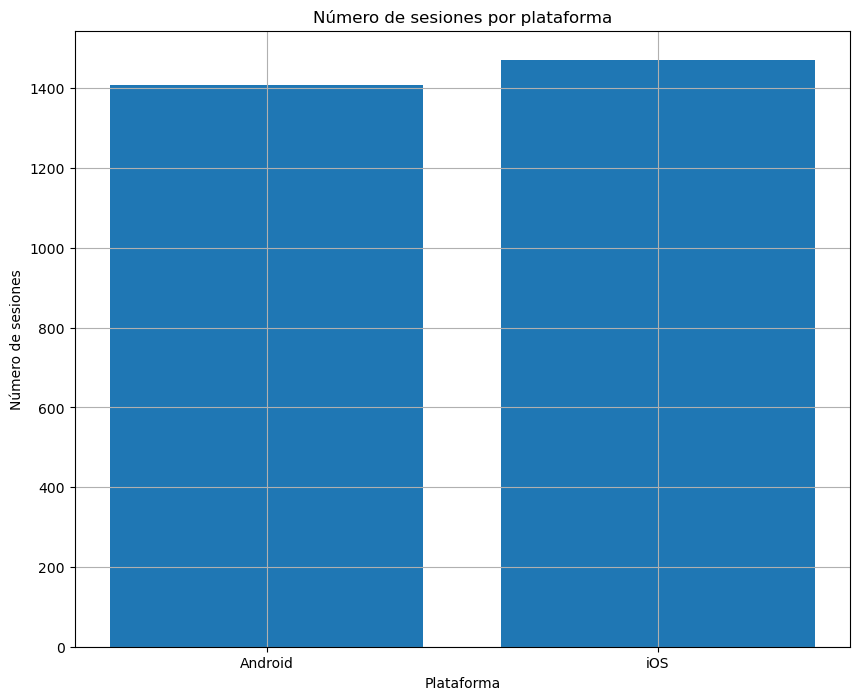

In [31]:
# tamaño de figura
plt.figure(figsize=(10, 8))

# gráfico de barras
plt.bar(platform_sessions.index, platform_sessions.values)
plt.title("Número de sesiones por plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Número de sesiones")
plt.grid()
plt.show()


En el gráfico de barras se puede visualizar que las sesiones en iOs son ligeramente superiores a las de Android, sin embargo, la diferencia es mínima.

In [51]:
# duracion de sesiones por plataforma
platform_duration = app_grouped_by_platform['session_duration'].sum()

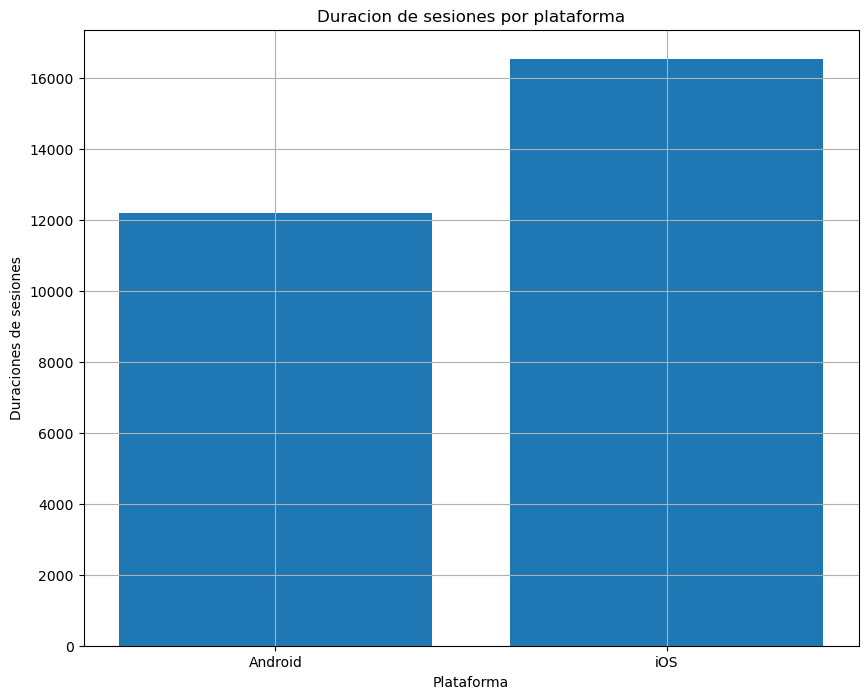

In [53]:
# tamaño de figura
plt.figure(figsize=(10, 8))

# gráfico de barras
plt.bar(platform_duration.index, platform_duration.values)
plt.title("Duracion de sesiones por plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Duraciones de sesiones")
plt.grid()
plt.show()

Las sesiones tienen mayor duracion en la plataforma de iOS

In [32]:
# agrupar los datos por pais
app_grouped_by_country = app.groupby('country')

In [34]:
# numero de sesiones por paises
country_session = app_grouped_by_country['number_of_sessions'].sum()

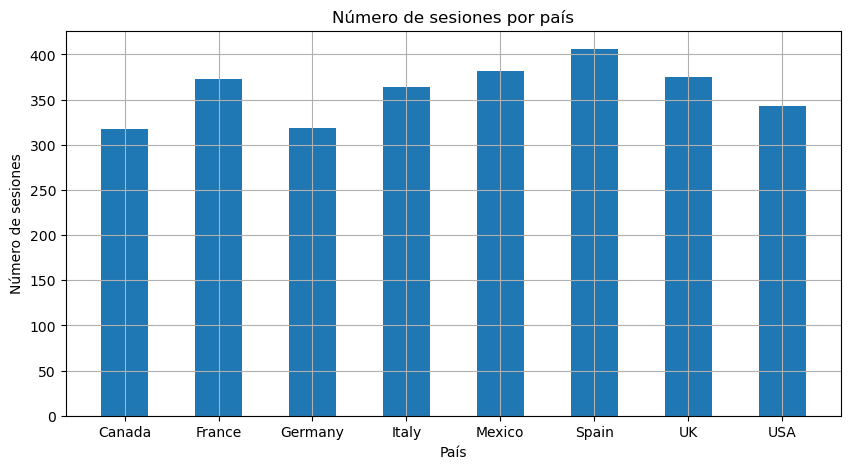

In [39]:
# tamaño de figura
plt.figure(figsize=(10, 5))

# gráfico de barras
plt.bar(country_session.index, country_session.values, width=0.5)
plt.title("Número de sesiones por país")
plt.xlabel("País")
plt.ylabel("Número de sesiones")
plt.grid()
plt.show()


En el grafico se observa que el mayor número de sesiones lo tienen en España y el menor número en Canada, Alemania y Estados Unidos.

In [41]:
# duracion de sesion por paises
country_duration = app_grouped_by_country['session_duration'].sum()

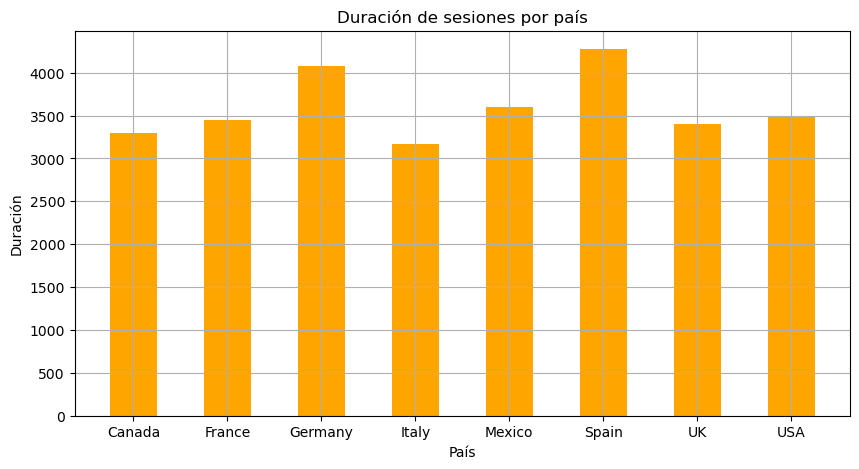

In [45]:
# tamaño de figura
plt.figure(figsize=(10, 5))

# gráfico de barras
plt.bar(country_duration.index, country_duration, width=0.5, color='orange')
plt.title("Duración de sesiones por país")
plt.xlabel("País")
plt.ylabel("Duración")
plt.grid()
plt.show()

Al contrario de los visualizado en el gráfico anterior, se observa que Alemania tiene las duraciones más largas, es decir que, a pesar de que en Alemania hayan pocos usuarios, esos usuarios utilizan la app con mayor frecuencia y con sesiones más prolongadas.

In [77]:
# agrupar por version y por plataforma
app_grouped_by_version = app.groupby(['app_version','platform'])
app_version_number = app_grouped_by_version['number_of_sessions'].sum().unstack()
# unstack reorganiza los datos en formato de tabla, asi las plataformas son columnas
print(app_version_number)

platform     Android  iOS
app_version              
1.0              396  355
1.1              309  347
1.2              290  438
1.3              413  331


<Figure size 1000x800 with 0 Axes>

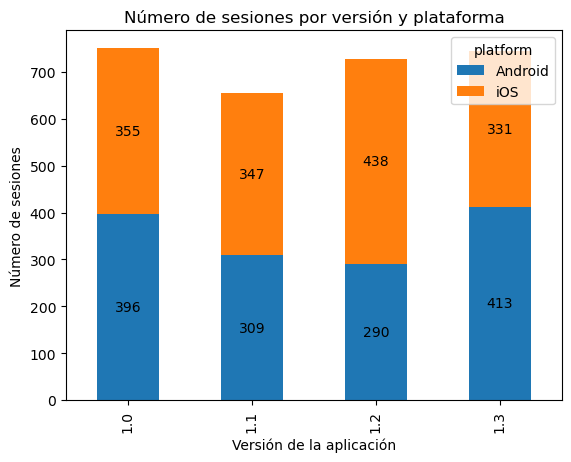

In [78]:
# tamaño de figura
plt.figure(figsize=(10, 8))

# gráfico de barras apilada 
ax = app_version_number.plot(kind='bar', stacked=True)

# titulo y etiquetas
plt.title("Número de sesiones por versión y plataforma")
plt.xlabel("Versión de la aplicación")
plt.ylabel("Número de sesiones")

# labels
for bars in ax.containers:
    ax.bar_label(bars, label_type='center')  

plt.show()


En el gráfico se visualiza el número de sesiones por versión de aplicación y por plataforma. El mayor número de sesiones es en iOs, y la versión más utilizada es la 1.0, siendo la menos utilizada la 1.1. 

In [80]:
# agrupar por version y por plataforma
app_grouped_by_version = app.groupby(['app_version','platform'])
app_version_duration = app_grouped_by_version['session_duration'].sum().unstack()
# unstack reorganiza los datos en formato de tabla, asi las plataformas son columnas
print(app_version_duration)

platform     Android   iOS
app_version               
1.0             3084  3978
1.1             2241  3660
1.2             3077  4617
1.3             3811  4284


<Figure size 1000x800 with 0 Axes>

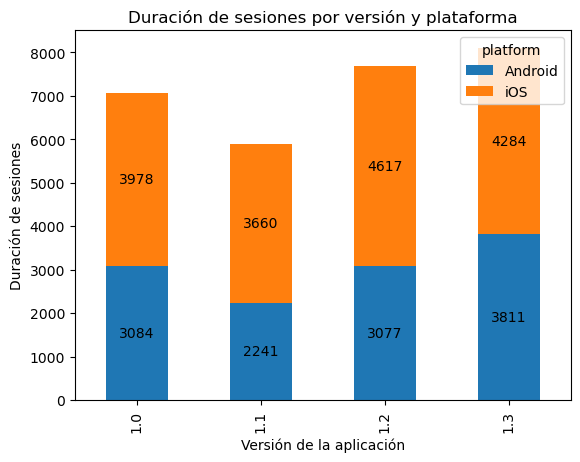

In [81]:
# tamaño de figura
plt.figure(figsize=(10, 8))

# gráfico de barras apilada 
ax = app_version_duration.plot(kind='bar', stacked=True)

# titulo y etiquetas
plt.title("Duración de sesiones por versión y plataforma")
plt.xlabel("Versión de la aplicación")
plt.ylabel("Duración de sesiones")

# labels
for bars in ax.containers:
    ax.bar_label(bars, label_type='center')  

plt.show()

El mayor tiempo de uso de la aplicación se da en plataformas iOs, siendo las más prolongadas las de la versión 1.2